In [ ]:
Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

Q2. Split the dataset into a training set (70%) and a test set (30%).

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
## Independent and dependent feature
X = df.drop(labels = ['target'],axis = 1)
y = df.target

In [34]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier

In [37]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10)

In [38]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [44]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1])

In [45]:
from sklearn.metrics import accuracy_score,classification_report

In [46]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8131868131868132
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        40
           1       0.84      0.82      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



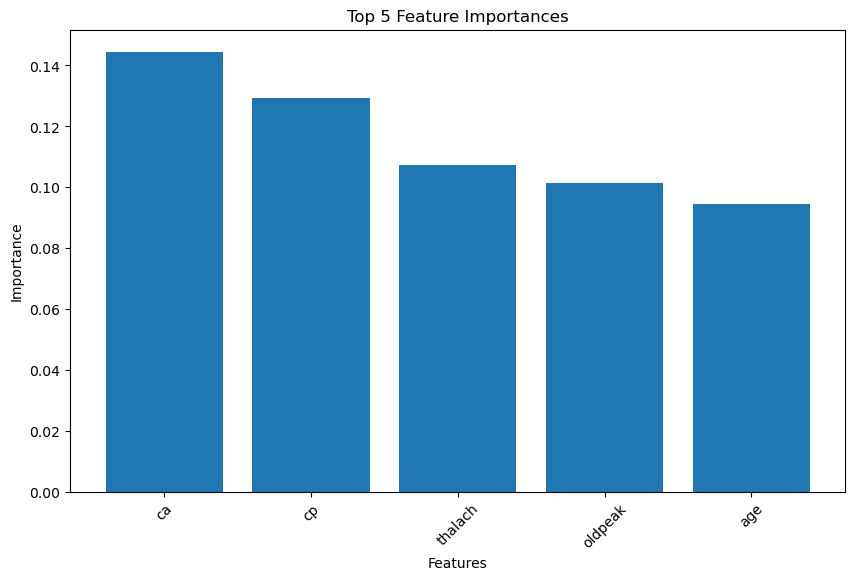

In [47]:
# Get the feature importances
importances = rf_classifier.feature_importances_
# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the feature importances in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Select the top 5 most important features
top_5_features = feature_importances_df.head(5)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_5_features['Feature'], top_5_features['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances')
plt.xticks(rotation=45)
plt.show()

In [48]:
classfier=RandomForestClassifier()

In [50]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy']
              }

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
cv=RandomizedSearchCV(classfier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.860 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.814 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.714 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.857 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.738 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.884 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.860 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.762 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.881 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=None, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [53]:
cv.best_params_

{'n_estimators': 300, 'max_depth': None, 'criterion': 'entropy'}